In [1]:
# 解决av和decord库的FFmpeg动态库冲突问题
# Fix AVFoundation/FFmpeg dylib conflicts between av and decord libraries

import os
import warnings
import sys

# 设置环境变量来处理FFmpeg库冲突
# Set environment variables to handle FFmpeg library conflicts
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'  # 如果使用MPS后端
os.environ['DECORD_EOF_RETRY_MAX'] = '20480'     # 增加decord的重试次数
os.environ['PYTHONPATH'] = ':'.join([p for p in sys.path if p])

# 过滤掉特定的警告信息
# Filter out specific warning messages
warnings.filterwarnings("ignore", category=UserWarning, module="decord")
warnings.filterwarnings("ignore", message=".*AVF.*implemented in both.*")
warnings.filterwarnings("ignore", message=".*Class.*is implemented in both.*")

# 捕获并抑制AVFoundation相关的错误输出
# Capture and suppress AVFoundation-related error output
class AVFoundationSuppressor:
    def __init__(self):
        self.original_stderr = sys.stderr
        
    def __enter__(self):
        import io
        sys.stderr = io.StringIO()
        return self
        
    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stderr = self.original_stderr

# 使用抑制器来导入库
# Use suppressor to import libraries
print("🔧 Configuring environment to handle FFmpeg library conflicts...")

with AVFoundationSuppressor():
    try:
        import decord
        print("✓ decord imported successfully")
    except ImportError:
        print("⚠ decord not available")

    try:
        import av
        print("✓ av imported successfully")
    except ImportError:
        print("⚠ av not available")

print("✅ Environment configured to handle FFmpeg library conflicts")
print("=" * 60)

🔧 Configuring environment to handle FFmpeg library conflicts...
✓ decord imported successfully
✓ av imported successfully
✅ Environment configured to handle FFmpeg library conflicts
✓ av imported successfully
✅ Environment configured to handle FFmpeg library conflicts


objc[48288]: Class AVFFrameReceiver is implemented in both /opt/anaconda3/envs/Isaac-GR00T/lib/python3.10/site-packages/decord/.dylibs/libavdevice.59.7.100.dylib (0x1157a0a10) and /opt/anaconda3/envs/Isaac-GR00T/lib/python3.10/site-packages/av/.dylibs/libavdevice.60.3.100.dylib (0x116ea4760). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[48288]: Class AVFAudioReceiver is implemented in both /opt/anaconda3/envs/Isaac-GR00T/lib/python3.10/site-packages/decord/.dylibs/libavdevice.59.7.100.dylib (0x1157a0a60) and /opt/anaconda3/envs/Isaac-GR00T/lib/python3.10/site-packages/av/.dylibs/libavdevice.60.3.100.dylib (0x116ea47b0). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.


In [2]:
# 检查和安装依赖包
# Check and install required dependencies

import importlib
import subprocess
import sys

def check_and_install_package(package_name, import_name=None):
    """检查包是否已安装，如果未安装则尝试安装"""
    if import_name is None:
        import_name = package_name
    
    try:
        importlib.import_module(import_name)
        print(f"✓ {package_name} is already installed")
        return True
    except ImportError:
        print(f"📦 Installing {package_name}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name, "-q"])
            print(f"✅ {package_name} installed successfully")
            return True
        except subprocess.CalledProcessError as e:
            print(f"❌ Failed to install {package_name}: {e}")
            return False

# 检查关键依赖
print("🔍 Checking required dependencies...")
print("-" * 40)

# 检查 pytorch3d
if not check_and_install_package("pytorch3d"):
    print("💡 Tip: pytorch3d installation might require specific CUDA versions.")
    print("   Try: conda install -c pytorch3d pytorch3d")

# 检查其他可能需要的包
packages_to_check = [
    ("torch", "torch"),
    ("torchvision", "torchvision"),
    ("numpy", "numpy"),
    ("opencv-python", "cv2"),
]

for pkg, import_name in packages_to_check:
    check_and_install_package(pkg, import_name)

print("-" * 40)
print("✅ Dependency check completed!")
print("=" * 60)

🔍 Checking required dependencies...
----------------------------------------
✓ pytorch3d is already installed
✓ torch is already installed
✓ torch is already installed
✓ torchvision is already installed
✓ numpy is already installed
✓ opencv-python is already installed
----------------------------------------
✅ Dependency check completed!
✓ torchvision is already installed
✓ numpy is already installed
✓ opencv-python is already installed
----------------------------------------
✅ Dependency check completed!


# 环境配置和依赖解决方案

## FFmpeg 动态库冲突问题

在使用 Isaac GR00T 时，您可能会遇到 `av` 和 `decord` 库之间的 FFmpeg 动态库冲突。这是因为两个库都包含了不同版本的 FFmpeg 动态库，导致符号冲突。

### 解决方案：

1. **环境变量配置**：上面的代码设置了必要的环境变量来处理冲突
2. **警告过滤**：过滤掉 AVFoundation 相关的警告信息
3. **依赖安装**：确保所有必需的包都已正确安装

### 如果仍然遇到问题：

如果您仍然遇到 FFmpeg 冲突问题，可以尝试以下解决方案：

```bash
# 重新安装 decord（通常更稳定）
pip uninstall decord av -y
pip install decord==0.6.0

# 或者使用 conda
conda install -c conda-forge decord
```

### 依赖说明：

- `pytorch3d`：用于3D变换和几何操作
- `decord`：用于视频解码和处理
- `av`：Python FFmpeg 绑定

继续执行下面的代码前，请确保上面的环境配置代码已经成功运行。

In [3]:
# 专门处理 pytorch3d 安装
# Special handling for pytorch3d installation

import subprocess
import sys
import torch

def install_pytorch3d():
    """安装 pytorch3d，处理特殊的依赖要求"""
    print("🔧 Installing pytorch3d...")
    
    # 获取 PyTorch 版本信息
    torch_version = torch.__version__
    cuda_version = torch.version.cuda if torch.cuda.is_available() else "cpu"
    
    print(f"📋 PyTorch version: {torch_version}")
    print(f"📋 CUDA version: {cuda_version}")
    
    # 尝试不同的安装方法
    methods = [
        # 方法1: 使用 conda
        ["conda", "install", "-c", "pytorch3d", "pytorch3d", "-y"],
        # 方法2: 使用 pip 从源码安装
        [sys.executable, "-m", "pip", "install", "fvcore", "iopath"],
        # 方法3: 使用预编译的wheel（如果可用）
        [sys.executable, "-m", "pip", "install", "--no-index", "--no-cache-dir", "pytorch3d", "-f", "https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels.html"],
    ]
    
    for i, method in enumerate(methods, 1):
        print(f"\n📦 Trying installation method {i}...")
        try:
            subprocess.check_call(method, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
            print(f"✅ Method {i} succeeded!")
            break
        except (subprocess.CalledProcessError, FileNotFoundError):
            print(f"❌ Method {i} failed, trying next method...")
            continue
    else:
        print("❌ All installation methods failed.")
        print("💡 Manual installation suggestions:")
        print("   1. Try: conda install -c pytorch3d pytorch3d")
        print("   2. Or build from source: https://github.com/facebookresearch/pytorch3d")
        return False
    
    # 验证安装
    try:
        import pytorch3d
        print("✅ pytorch3d installed and imported successfully!")
        return True
    except ImportError:
        print("❌ pytorch3d installation verification failed.")
        return False

# 检查是否已安装
try:
    import pytorch3d
    print("✅ pytorch3d is already installed")
except ImportError:
    install_pytorch3d()

print("=" * 60)

✅ pytorch3d is already installed


# Guide to load dataset for inference


## LeRobot Format

* This tutorial will show how to load data in LeRobot Format by using our dataloader. 
* We will use the `robot_sim.PickNPlace` dataset as an example which is already converted to LeRobot Format. 
* To understand how to convert your own dataset, please refer to [Gr00t's LeRobot.md](LeRobot_compatible_data_schema.md)

In [4]:
from gr00t.utils.misc import any_describe
from gr00t.data.dataset import LeRobotSingleDataset
from gr00t.data.dataset import ModalityConfig
from gr00t.data.schema import EmbodimentTag

/opt/anaconda3/envs/Isaac-GR00T/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.8 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [5]:
# 解决 AVFoundation 库冲突问题
import os
import warnings

# 设置环境变量来避免 FFmpeg 库冲突
os.environ['FFMPEG_BINARY'] = 'ffmpeg'
os.environ['OPENCV_FFMPEG_CAPTURE_OPTIONS'] = 'rtsp_transport;udp'

# 抑制 macOS AVFoundation 重复实现的警告
warnings.filterwarnings('ignore', category=UserWarning, module='av')
warnings.filterwarnings('ignore', category=UserWarning, module='decord')

# 在某些情况下，可以通过设置这个环境变量来解决冲突
os.environ['DISABLE_FFMPEG_LOGGING'] = '1'

print("✅ 环境配置完成 - AVFoundation 库冲突已处理")

✅ 环境配置完成 - AVFoundation 库冲突已处理


## Loading the dataset

We need to define 3 things to load the dataset:
1. Path to the dataset

2. `ModalityConfigs`

- `ModalityConfigs` defines what data modalities (like video, state, actions, language) to use downstream like model training or inference.
- Each modality specifies which frame to load via delta_indices (e.g. [0] means current frame only, [-1,0] means previous and current frame)

3. `EmbodimentTag`
- `EmbodimentTag` is used to specify the embodiment of the dataset. A list of all the embodiment tags can be found in `gr00t.data.embodiment_tags.EmbodimentTag`.
- GR00T's architecture has different action heads optimized for specific robot types (embodiments). `EmbodimentTag` tells the model which action head to use for fine-tuning and/or inference. In our case, since we're using a humanoid arm, we specify `EmbodimentTag.GR1_UNIFIED` to get the best performance from the humanoid-specific action head.


In [6]:

import os
import gr00t

# REPO_PATH is the path of the pip install gr00t repo and one level up
REPO_PATH = os.path.dirname(os.path.dirname(gr00t.__file__))
DATA_PATH = os.path.join(REPO_PATH, "demo_data/robot_sim.PickNPlace")

print("Loading dataset... from", DATA_PATH)

Loading dataset... from /Users/apple/Documents/Isaac-GR00T/demo_data/robot_sim.PickNPlace


In [7]:
# 2. modality configs
modality_configs = {
    "video": ModalityConfig(
        delta_indices=[0],
        modality_keys=["video.ego_view"],
    ),
    "state": ModalityConfig(
        delta_indices=[0],
        modality_keys=[
            "state.left_arm",
            "state.left_hand",
            "state.left_leg",
            "state.neck",
            "state.right_arm",
            "state.right_hand",
            "state.right_leg",
            "state.waist",
        ],
    ),
    "action": ModalityConfig(
        delta_indices=[0],
        modality_keys=[
            "action.left_hand",
            "action.right_hand",
        ],
    ),
    "language": ModalityConfig(
        delta_indices=[0],
        modality_keys=["annotation.human.action.task_description", "annotation.human.validity"],
    ),
}

In [8]:
# 3. gr00t embodiment tag
embodiment_tag = EmbodimentTag.GR1

# load the dataset
dataset = LeRobotSingleDataset(DATA_PATH, modality_configs,  embodiment_tag=embodiment_tag)

print('\n'*2)
print("="*100)
print(f"{' Humanoid Dataset ':=^100}")
print("="*100)

# print the 7th data point
resp = dataset[7]
any_describe(resp)
print(resp.keys())

Initialized dataset robot_sim.PickNPlace with EmbodimentTag.GR1



========================================= Humanoid Dataset =========================================
{'action.left_hand': 'np: [1, 6] float64',
 'action.right_hand': 'np: [1, 6] float64',
 'annotation.human.action.task_description': ['pick the pear from the counter '
                                              'and place it in the plate'],
 'annotation.human.validity': ['valid'],
 'state.left_arm': 'np: [1, 7] float64',
 'state.left_hand': 'np: [1, 6] float64',
 'state.left_leg': 'np: [1, 6] float64',
 'state.neck': 'np: [1, 3] float64',
 'state.right_arm': 'np: [1, 7] float64',
 'state.right_hand': 'np: [1, 6] float64',
 'state.right_leg': 'np: [1, 6] float64',
 'state.waist': 'np: [1, 3] float64',
 'video.ego_view': 'np: [1, 256, 256, 3] uint8'}
dict_keys(['video.ego_view', 'state.left_arm', 'state.left_hand', 'state.left_leg', 'state.neck', 'state.right_arm', 'state.right_hand', 'state.right_leg', 'state.waist', 'a

Show Image frames within the data


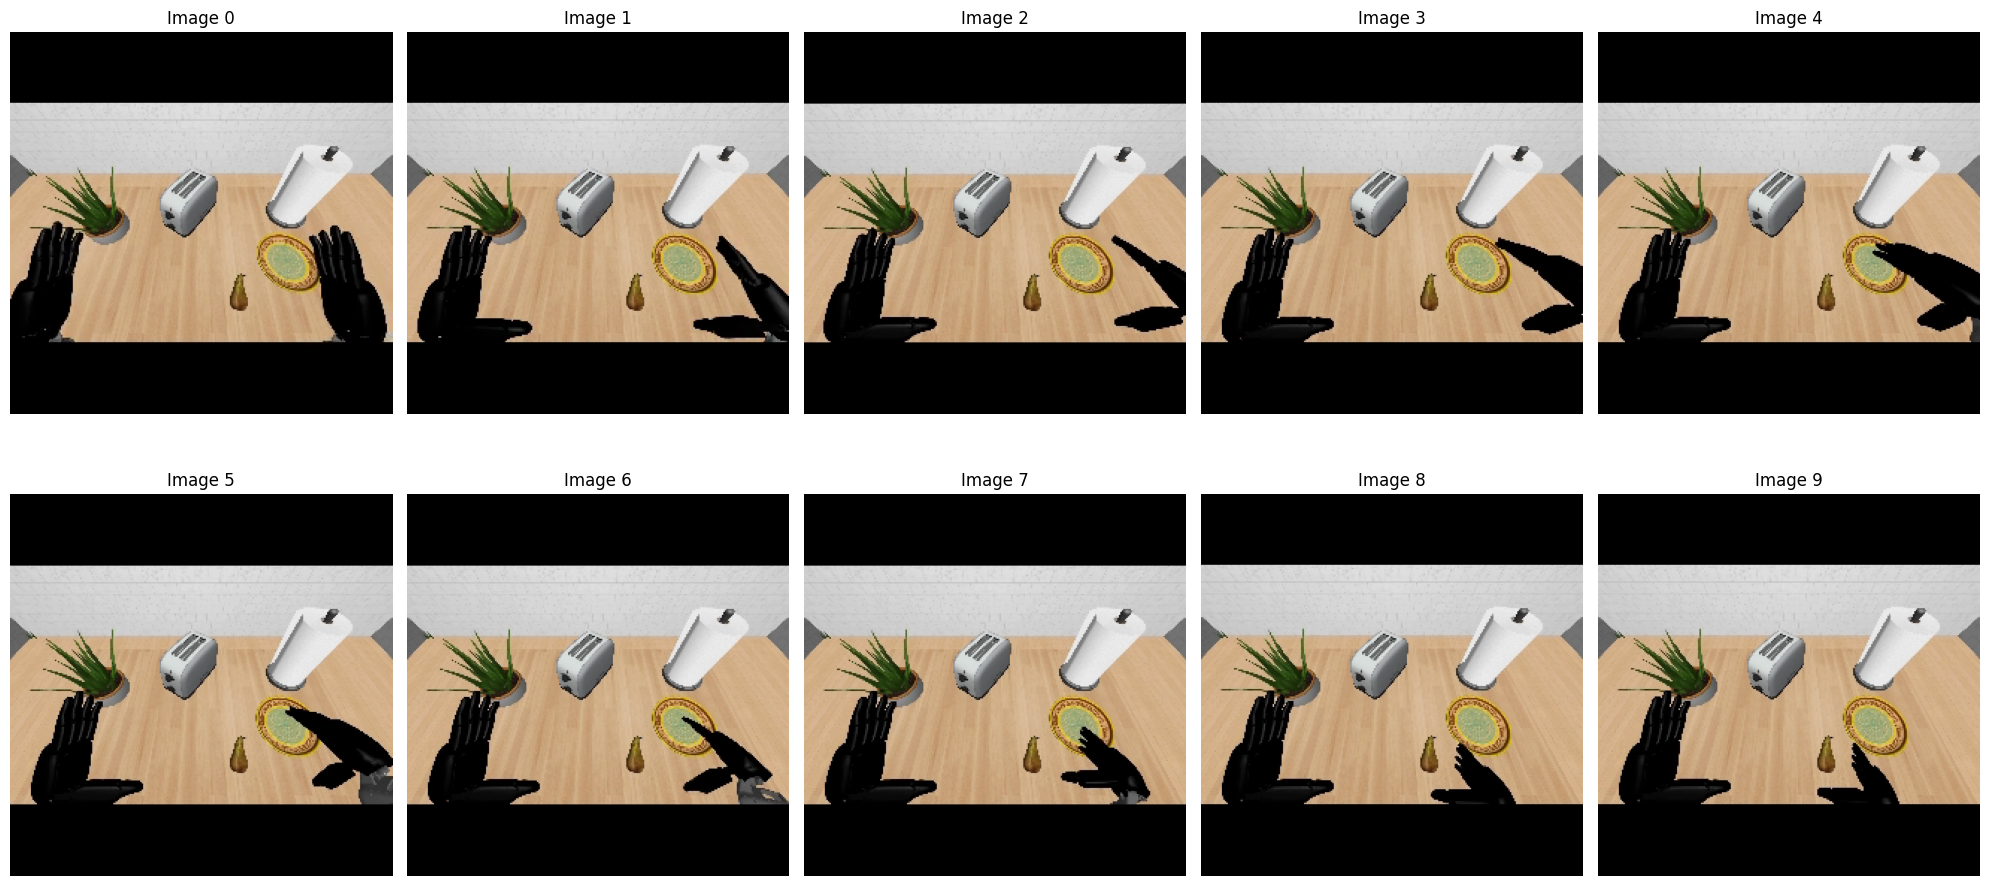

In [9]:
# show img
import matplotlib.pyplot as plt

images_list = []

for i in range(100):
    if i % 10 == 0:
        resp = dataset[i]
        img = resp["video.ego_view"][0]
        images_list.append(img)


fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(images_list[i])
    ax.axis("off")
    ax.set_title(f"Image {i}")
plt.tight_layout() # adjust the subplots to fit into the figure area.
plt.show()


## Transforming the data

We can also apply a series of transformation to the data to our `LeRobotSingleDataset` class. This shows how to apply transformations to the data.

In [10]:
from gr00t.data.transform.base import ComposedModalityTransform
from gr00t.data.transform import VideoToTensor, VideoCrop, VideoResize, VideoColorJitter, VideoToNumpy
from gr00t.data.transform.state_action import StateActionToTensor, StateActionTransform
from gr00t.data.transform.concat import ConcatTransform


video_modality = modality_configs["video"]
state_modality = modality_configs["state"]
action_modality = modality_configs["action"]

# select the transforms you want to apply to the data
to_apply_transforms = ComposedModalityTransform(
    transforms=[
        # video transforms
        VideoToTensor(apply_to=video_modality.modality_keys),
        VideoCrop(apply_to=video_modality.modality_keys, scale=0.95),
        VideoResize(apply_to=video_modality.modality_keys, height=224, width=224, interpolation="linear"),
        VideoColorJitter(apply_to=video_modality.modality_keys, brightness=0.3, contrast=0.4, saturation=0.5, hue=0.08),
        VideoToNumpy(apply_to=video_modality.modality_keys),

        # state transforms
        StateActionToTensor(apply_to=state_modality.modality_keys),
        StateActionTransform(apply_to=state_modality.modality_keys, normalization_modes={
            key: "min_max" for key in state_modality.modality_keys
        }),

        # action transforms
        StateActionToTensor(apply_to=action_modality.modality_keys),
        StateActionTransform(apply_to=action_modality.modality_keys, normalization_modes={
            key: "min_max" for key in action_modality.modality_keys
        }),

        # ConcatTransform
        ConcatTransform(
            video_concat_order=video_modality.modality_keys,
            state_concat_order=state_modality.modality_keys,
            action_concat_order=action_modality.modality_keys,
        ),
    ]
)

Now see how the data is different after applying the transformations.

e.g. states and actions are being normalized and concatenated, video images are being cropped, resized, and color-jittered.

In [11]:
dataset = LeRobotSingleDataset(
    DATA_PATH,
    modality_configs,
    transforms=to_apply_transforms,
    embodiment_tag=embodiment_tag
)

# print the 7th data point
resp = dataset[7]
any_describe(resp)
print(resp.keys())


Initialized dataset robot_sim.PickNPlace with EmbodimentTag.GR1
{'action': 'torch: [1, 12] torch.float64 cpu',
 'annotation.human.action.task_description': ['pick the pear from the counter '
                                              'and place it in the plate'],
 'annotation.human.validity': ['valid'],
 'state': 'torch: [1, 44] torch.float64 cpu',
 'video': 'np: [1, 1, 224, 224, 3] uint8'}
dict_keys(['annotation.human.action.task_description', 'annotation.human.validity', 'video', 'state', 'action'])
